In [2]:
import importlib
from matplotlib import pyplot as plt 


import calibration_metric
from calibration_metric import ECEMetric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader
importlib.reload(calibration_metric)


<module 'calibration_metric' from '/home/estengel/calibration_metric/calibration_metric/__init__.py'>

In [3]:


reader = MisoTopLogitFormatSequenceReader("/brtx/604-nvme1/estengel/calflow_calibration/miso/tune_roberta_tok_fix_benchclamp_data/translate_output/test_all.logits", ignore_tokens=None)
top_preds, is_correct = reader.read()




## Step 1: bin confidences and show on y axis 

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


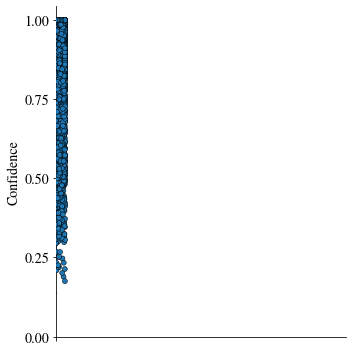

In [4]:
import seaborn as sns
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

plt.rcParams["font.family"] = "Nimbus Roman"

fig, ax = plt.subplots(figsize=(5,5))
sns.despine()
sns.stripplot(x=np.zeros_like(top_preds), y=top_preds, jitter=0.03, ax=ax, edgecolor= "black", linewidth=0.5)
ax.set_xlim(0,1)
ax.set_xticklabels([])
ax.set_ylabel("Confidence", fontsize=14)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)

plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/confidence_stripplot.pdf")


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


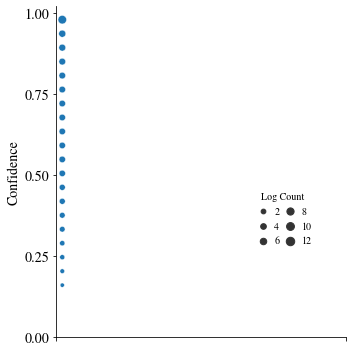

In [42]:
metric = ECEMetric(20, return_df = True)
ece, df = metric(top_preds, is_correct) 

new_top_preds = df['prob_model'].values
log_count = df['log_count'].values
xs = np.ones_like(new_top_preds) * 0.02
fig, ax = plt.subplots(figsize=(5,5))
sns.despine()
sns.scatterplot(x=xs, y=new_top_preds, size=log_count, ax=ax)
ax.set_xlim(0,1)
ax.set_xlabel("", fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(["", ""], fontsize=12)
ax.set_ylabel("Confidence", fontsize=14)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)
ax.legend().remove()
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", 
            frameon=False, bbox_to_anchor=(0.9, 0.48), handletextpad=0.1, columnspacing=0.1)

plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/confidence_binned.pdf")


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


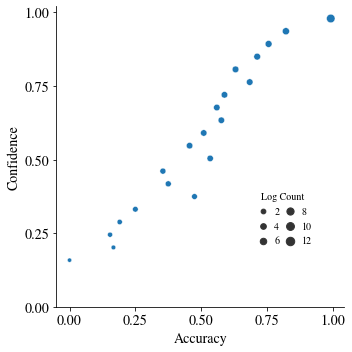

In [43]:

log_count = df['log_count'].values
xs = df['prob_correct'].values
fig, ax = plt.subplots(figsize=(5,5))
sns.despine()
sns.scatterplot(x=xs, y=new_top_preds, size=log_count, ax=ax)
ax.set_xlabel("Accuracy", fontsize=14)
ax.set_xticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_xticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)
ax.set_ylabel("Confidence", fontsize=14)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)
ax.legend().remove()
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", 
            frameon=False, bbox_to_anchor=(0.9, 0.48), handletextpad=0.1, columnspacing=0.1)


plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/confidence_and_accuracy.pdf")

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


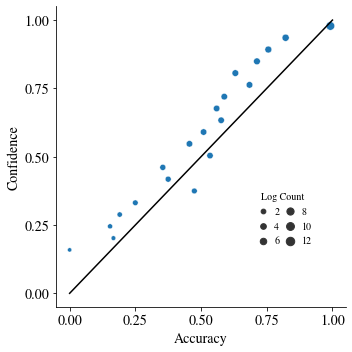

In [44]:


log_count = df['log_count'].values
xs = df['prob_correct'].values
fig, ax = plt.subplots(figsize=(5,5))
sns.despine()
sns.scatterplot(x=xs, y=new_top_preds, size=log_count, ax=ax)
ax.set_xlabel("Accuracy", fontsize=14)
ax.set_xticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_xticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)
ax.set_ylabel("Confidence", fontsize=14)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", 
            frameon=False, bbox_to_anchor=(0.9, 0.48), handletextpad=0.1, columnspacing=0.1)

xs_line = np.linspace(0,1,2)
ys_line = xs_line
sns.lineplot(x = xs_line, y=ys_line, ax=ax, color='black')
ax.legend().remove()


plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/confidence_and_accuracy_with_line.pdf")

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


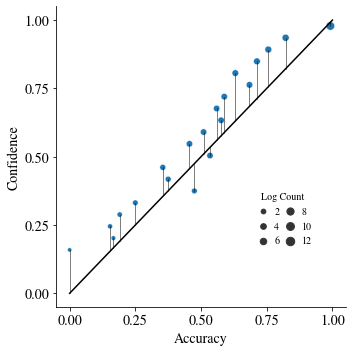

In [45]:


log_count = df['log_count'].values
xs = df['prob_correct'].values
fig, ax = plt.subplots(figsize=(5,5))
sns.despine()
sns.scatterplot(x=xs, y=new_top_preds, size=log_count, ax=ax)
ax.set_xlabel("Accuracy", fontsize=14)
ax.set_xticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_xticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)
ax.set_ylabel("Confidence", fontsize=14)
ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
ax.set_yticklabels([f"{x:.2f}" for x in [0.00, 0.25, 0.50, 0.75, 1.00]], fontsize=14)

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, title="Log Count", 
            frameon=False, bbox_to_anchor=(0.9, 0.48), handletextpad=0.1, columnspacing=0.1)

xs_line = np.linspace(0,1,2)
ys_line = xs_line
sns.lineplot(x = xs_line, y=ys_line, ax=ax, color='black')

for pred_y, x in zip(new_top_preds, xs):
    diff = pred_y - x
    diff_start_y = x
    diff_end_y = pred_y
    plt.plot([ diff_start_y, x], [diff_end_y, x], color='black', linewidth=0.5)


ax.legend().remove()

plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/confidence_and_accuracy_with_error.pdf")

In [1]:
# make blank fig

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


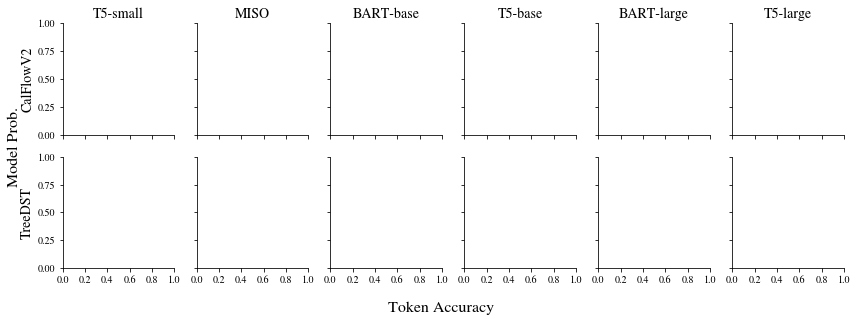

In [12]:
fig, axes = plt.subplots(2, 6, figsize=(14, 4.5), sharex=True, sharey=True)
sns.despine()


names = ["T5-small", "MISO", "BART-base", "T5-base", "BART-large", "T5-large"]
for i in range(len(axes[0])):
    axes[0,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes[0,i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
    axes[0,i].set_title(names[i], fontsize=14)
axes[0,0].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axes[0,0].set_yticklabels([f"{x:.2f}" for x in [0.0, 0.25, 0.5, 0.75, 1.0]], fontsize=10)
axes[1,0].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axes[1,0].set_yticklabels([f"{x:.2f}" for x in [0.0, 0.25, 0.5, 0.75, 1.0]], fontsize=10)

axes[0,0].set_ylabel("CalFlowV2", fontsize=14)
axes[1,0].set_ylabel("TreeDST", fontsize=14)

fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=16)
fig.text(0.5, -0.01, "Token Accuracy", ha='center', fontsize=16)

plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/job_talk_figs/blank_all_models_calibration_plot.pdf", bbox_inches='tight')